![training](assets/training-basics/puppy-training.jpg)

(image: amazon)

# Training basics

Concepts in training models
- Loss functions
- Gradient descent
- Overfitting, underfitting, bias, variance
- Regularization
- Cross-validation

Objective: a model that trains fast and performs well

## 1. Loss Functions

What they are: a metric of how far away the predictions are from the truth

For example:

![MSE](http://scikit-learn.org/stable/_images/math/44f36557fef9b30b077b21550490a1b9a0ade154.png)

a.k.a.:
- Objective function
- Cost function
- Error function

### Definitions

$$x^* = \arg \min f(x)$$

where $x^*$ = value that minimizes the loss function $f(x)$

The process of finding $x^*$ is called "Optimization". It usually involves running some type of Gradient Descent. 

### Loss Function Examples

Scikit-learn:
- [Mean squared error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): `sklearn.metrics.mean_squared_error(y_true, y_pred)`
- [Log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss): `sklearn.metrics.log_loss(y_true, y_pred)`
- [Zero one loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss)
`sklearn.metrics.zero_one_loss(y_true, y_pred)`
- etc

Keras:
- https://keras.io/losses/
- `keras.losses.mean_squared_error(y_true, y_pred)`
- `keras.losses.binary_crossentropy(y_true, y_pred)`
- etc

## 2. Gradient Descent

What it is: technique for minimizing loss function for a given model

Objective: find $w^*$ such that $$w^* = \underset{w}\arg \min{f\big(y_{true}, y_{pred}\big)}$$

$$w^* = \underset{w}\arg \min{f\big(y_{true}, g(x, w)\big)}$$


where
- $f(...)$ is the loss function
- $w$ are the weights
- $g(x, w)$ is the model that computes $y_{pred}$

### Gradient descent algorithm

1. Initialize $w$ to some value (e.g. random)
2. Compute gradient of $f\big(y_{true}, g(x, w)\big)$
3. Update $w$ by a "tiny factor" in the negative of the gradient
4. Repeat 2-3 until loss is "good enough"

The "tiny factor" is known as the "learning rate"

### Walkthrough: Gradient descent. Animated

![wake up](assets/training-basics/descend.jpg)

(what goes in my head during training)

### Environment Setup

Create a new environment called `mldds02`. You may also reuse `mldds01`, but it's good to keep separate environments for different experiments.

```
conda create -n mldds02 python=3
conda activate mldds02

(mldds02) conda install jupyter numpy pandas matplotlib scikit-learn
(mldds02) conda install -c conda-forge ffmpeg
```

In [6]:
# Credits: https://jed-ai.github.io/py1_gd_animation/

import numpy as np
import matplotlib.pyplot as plt

"""Example gradient descent implementation"""

def func_y(x):
    """A demonstrative loss function that happens to be convex (has global a minimum)
    Args:
        x - the input (can be the weights of a machine learning algorithm)
    Returns:
        The loss value
    """
    return x**2 - 4*x + 2

def gradient_func_y(x):
    """The gradient of func_y
    Args:
        x - the input
    Returns:
        The gradient value
    """
    return 2*x - 4 # d(x^2 - 4x + 2)/dx = 2x - 4

def gradient_descent(previous_x, learning_rate, epochs):
    """An implementation of gradient descent
    Args:
        previous_x - the previous input value
        learning_rate - how much to change x per iteration
        epochs - number of steps to run gradient descent
    Returns:
        A tuple: array of x values, array of loss values
    """
    x_gd = []
    y_gd = []
    x_gd.append(previous_x)
    y_gd.append(func_y(previous_x))
    
    # loop to update x and y
    for i in range(epochs):
        # x = lr * gradient(func(prev_x))
        update = learning_rate *gradient_func_y(previous_x)
        x = previous_x - update
        print('step', i, 'previous x', previous_x,
              'update:', -update, 'new x:', x)
        x_gd.append(x)
        y_gd.append(func_y(x))
        
        # update previous_x
        previous_x = x
    
    return x_gd, y_gd

With gradient descent implemented, we'll will now run it.

In [32]:
x0 = -0.7
learning_rate = 0.15
epochs = 10

x = np.arange(-1, 5, 0.01)
y = func_y(x)
x_gd, y_gd = gradient_descent(x0, learning_rate, epochs)

step 0 previous x -0.7 update: 0.81 new x: 0.1100000000000001
step 1 previous x 0.1100000000000001 update: 0.567 new x: 0.677
step 2 previous x 0.677 update: 0.3969 new x: 1.0739
step 3 previous x 1.0739 update: 0.27782999999999997 new x: 1.35173
step 4 previous x 1.35173 update: 0.19448099999999996 new x: 1.546211
step 5 previous x 1.546211 update: 0.1361367 new x: 1.6823477
step 6 previous x 1.6823477 update: 0.09529569 new x: 1.77764339
step 7 previous x 1.77764339 update: 0.06670698300000001 new x: 1.844350373
step 8 previous x 1.844350373 update: 0.04669488810000002 new x: 1.8910452611
step 9 previous x 1.8910452611 update: 0.03268642167000002 new x: 1.92373168277


Plot the animation.

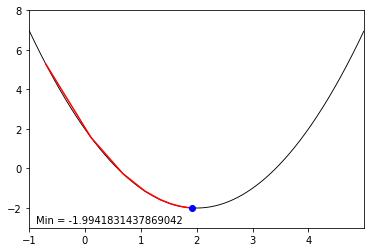

In [33]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()
ax.set_xlim([min(x), max(x)])
ax.set_ylim([-3, max(y)+1])
ax.plot(x, y, lw = 0.9, color = 'k')

line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax.plot([], [], 'bo', animated=True)
value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)

def init():
    """Initializes the animation"""
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    """Animates the plot at step i
    Args:
        i: the step to animate
        return: a tuple of line, point, and value_display
    """
    # Animate line
    line.set_data(x_gd[:i], y_gd[:i])
    
    # Animate points
    point.set_data(x_gd[i], y_gd[i])

    # Animate value display
    value_display.set_text('Min = ' + str(y_gd[i]))

    return line, point, value_display

# call the animator
rc('animation', html='html5')
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(x_gd), interval=360,
                     repeat_delay=60, blit=True)

# display the video
HTML(anim.to_html5_video())